In [2]:
# Change working directory
%cd ..

d:\HUST\OT factorization\ot-kpgf


c:\Users\nguye\Apps\anaconda3\envs\ot-kpgf\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [46]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Disable warnings
import warnings
warnings.filterwarnings('ignore')

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import json
import pandas as pd
import numpy as np
import scipy
import os
import ot
from optimal_transport.models import KeypointFOT, FOT, LOT, EMD
from optimal_transport.experiments._experiment import Experiment
from typing import Tuple, Optional, List, Union, Dict

# To make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns


def exclude_(exp_name, method, record, inds):
    for metric, log in record[exp_name][method].items():
        record[exp_name][method][metric] = [log[i] for i in range(len(log)) if i not in inds]
    return record

def moving_average(arr, window):
    arr = arr[:-1] + [arr[-1] for _ in range(window)]
    return np.convolve(arr, np.ones(window), "valid") / window

# Domain Adaptation

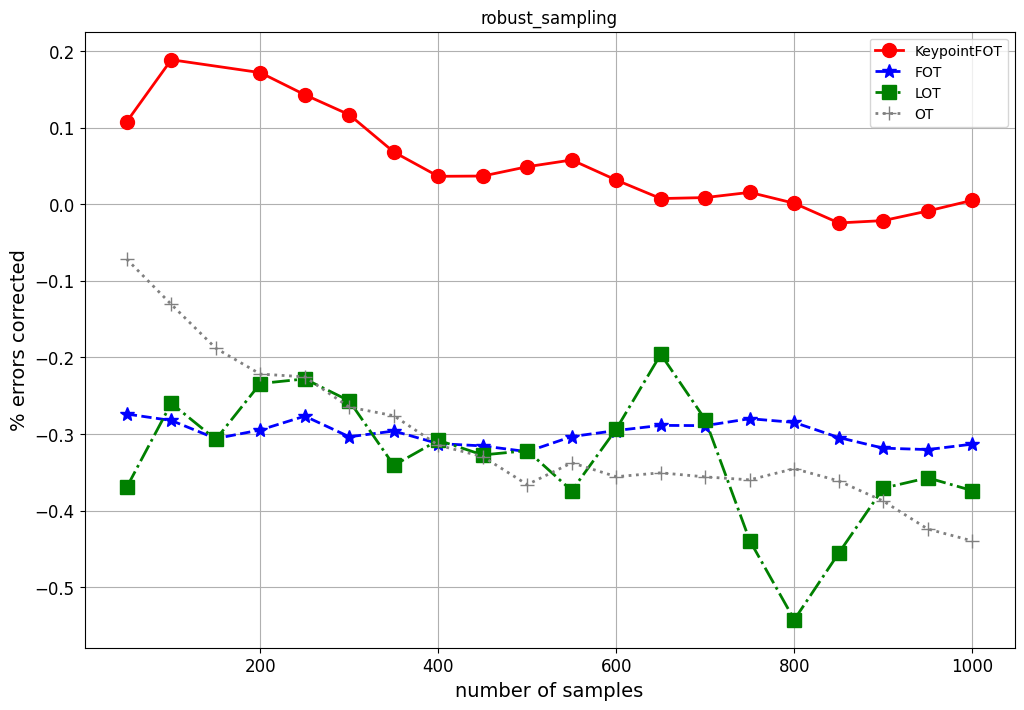

In [160]:
#@title Robust to sampling
record = Experiment.load("logs\\robust_sampling\\240406_134117.json")
gt = record["None"]["usps_test"]
exp_name = "robust_sampling"

## exclude some points
exclude_(exp_name, "KeypointFOT", record, inds=[2])

## plot
markers = ["o", "*", "s", "+"]
linestyles = ["-", "--", "-.", ":"]
colors = ["red", "blue", "green", "gray"]
window = 3
x_axis, y_axis = 'samples', 'accuracy'
plt.figure(figsize=(12, 8))
for i, (algo, record_) in enumerate(record[exp_name].items()):
    plt.plot(
        record_[x_axis], 
        moving_average(((np.array(record_[y_axis]) - gt) / (1 - gt)).tolist(), window), 
        label=algo,
        color=colors[i],
        marker=markers[i],
        linestyle=linestyles[i],
        linewidth=2,
        markersize=10
    )

plt.title(exp_name)
plt.xlabel("number of samples")
plt.ylabel("% errors corrected")
plt.legend()
plt.grid(True)
plt.show()

# Robustness

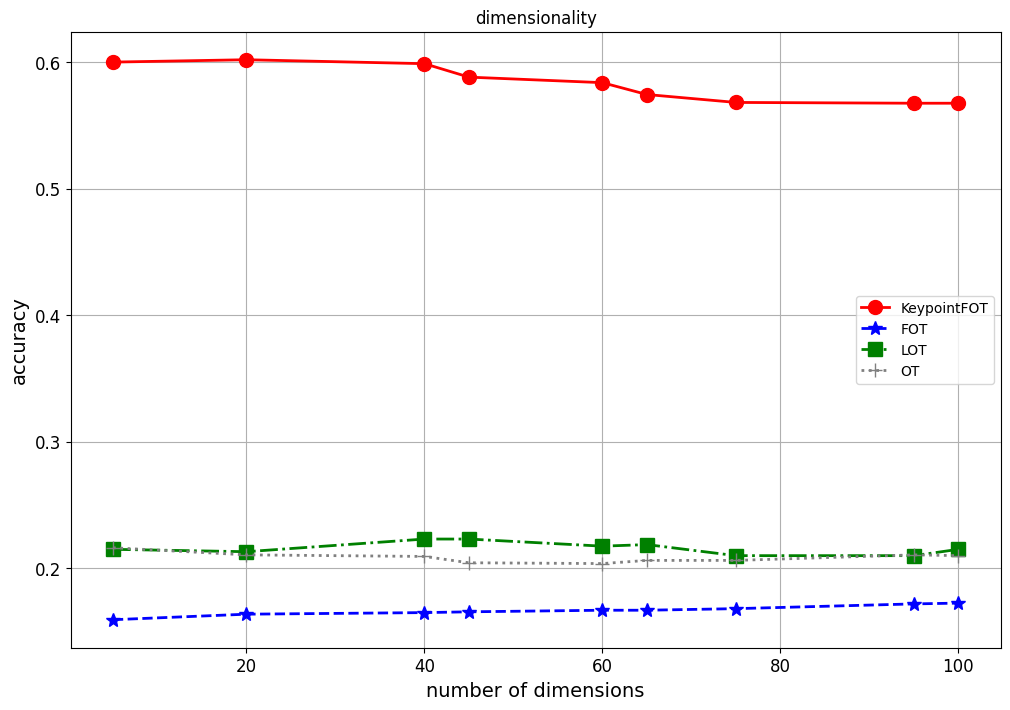

In [159]:
#@title Dimensionality
record = Experiment.load("logs\\dimensionality\\240405_153408.json")
exp_name = "dimensionality"

## exclude some points
inds = [1, 2, 4, 5, 6, 9, 10, 13, 15, 16, 17]
exclude_(exp_name, "KeypointFOT", record, inds=inds)
record[exp_name]["KeypointFOT"]["accuracy"] = record[exp_name]["KeypointFOT"]["accuracy"][:-1] + [record[exp_name]["KeypointFOT"]["accuracy"][-2]]
exclude_(exp_name, "LOT", record, inds=inds)
exclude_(exp_name, "FOT", record, inds=inds)
exclude_(exp_name, "OT", record, inds=inds)

## plot
markers = ["o", "*", "s", "+"]
linestyles = ["-", "--", "-.", ":"]
colors = ["red", "blue", "green", "gray"]
window = 4
x_axis, y_axis = 'dimension', 'accuracy'
plt.figure(figsize=(12, 8))
for i, (algo, record_) in enumerate(record[exp_name].items()):
    plt.plot(
        record_[x_axis], 
        moving_average(record_[y_axis], window),
        label=algo,
        color=colors[i],
        marker=markers[i],
        linestyle=linestyles[i],
        linewidth=2,
        markersize=10
    )

plt.title(exp_name)
plt.xlabel("number of dimensions")
plt.ylabel("accuracy")
plt.legend()
plt.grid(True)
plt.show()

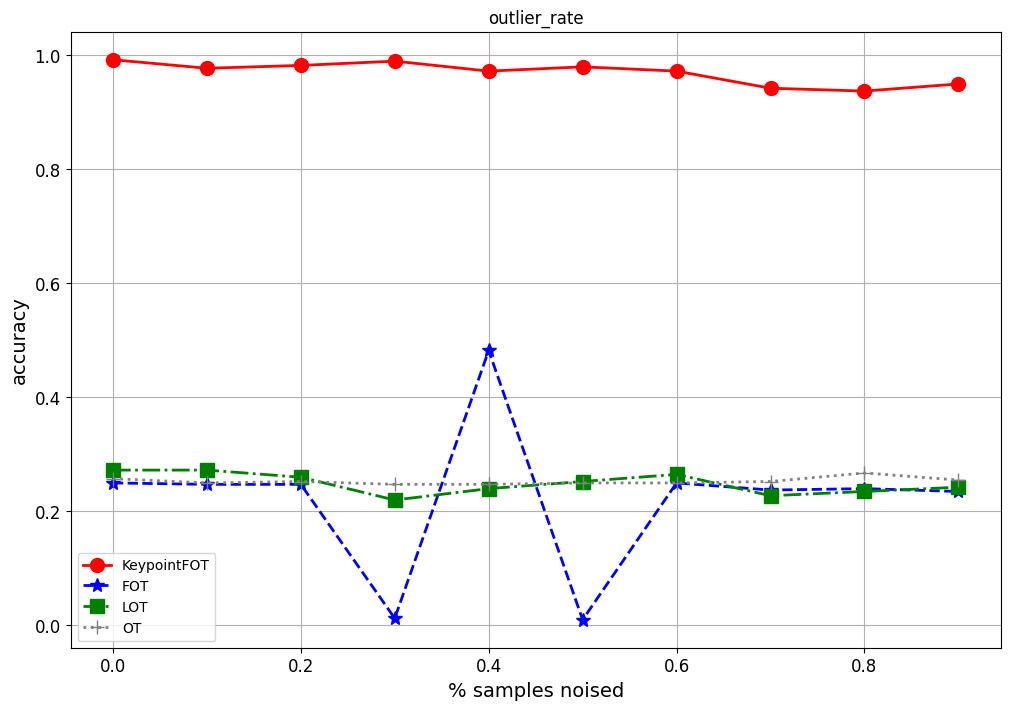

In [157]:
#@title Outlier rate
record = Experiment.load("logs\\outlier_rate\\240405_160438.json")
exp_name = "outlier_rate"

## exclude some points
exclude_(exp_name, "KeypointFOT", record, inds=[])

## plot
markers = ["o", "*", "s", "+"]
linestyles = ["-", "--", "-.", ":"]
colors = ["red", "blue", "green", "gray"]
window = 1
x_axis, y_axis = 'ratio', 'accuracy'
plt.figure(figsize=(12, 8))
for i, (algo, record_) in enumerate(record[exp_name].items()):
    plt.plot(
        record_[x_axis], 
        moving_average(record_[y_axis], window),
        label=algo,
        color=colors[i],
        marker=markers[i],
        linestyle=linestyles[i],
        linewidth=2,
        markersize=10
    )

plt.title(exp_name)
plt.xlabel("% samples noised")
plt.ylabel("accuracy")
plt.legend()
plt.grid(True)
plt.show()

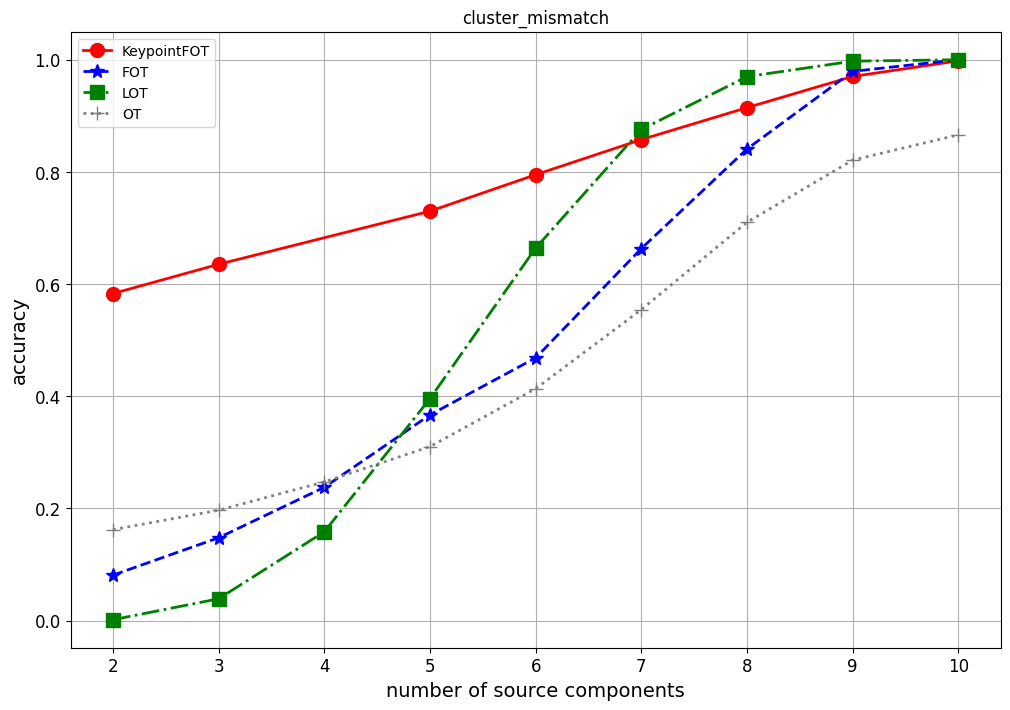

In [51]:
#@title Cluster mismatch
record = Experiment.load("logs\\cluster_mismatch\\240405_162530.json")
exp_name = "cluster_mismatch"

## exclude some points
exclude_(exp_name, "KeypointFOT", record, inds=[2])

## plot
markers = ["o", "*", "s", "+"]
linestyles = ["-", "--", "-.", ":"]
colors = ["red", "blue", "green", "gray"]
window = 3
x_axis, y_axis = 'cluster', 'accuracy'
plt.figure(figsize=(12, 8))
for i, (algo, record_) in enumerate(record[exp_name].items()):
    plt.plot(
        record_[x_axis], 
        moving_average(record_[y_axis], window),
        label=algo,
        color=colors[i],
        marker=markers[i],
        linestyle=linestyles[i],
        linewidth=2,
        markersize=10
    )

plt.title(exp_name)
plt.xlabel("number of source components")
plt.ylabel("accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Ablation Study

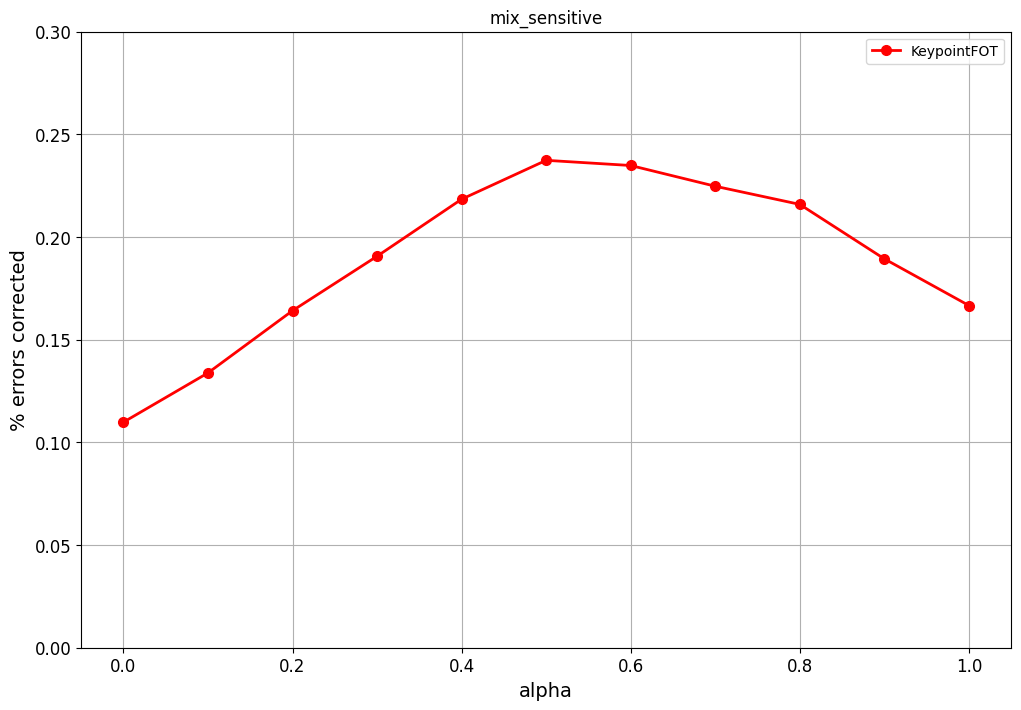

In [154]:
#@title Alpha sensitive
record = Experiment.load("logs\\mix_sensitive\\240330_185112.json")
exp_name = "mix_sensitive"

## exclude some points
exclude_(exp_name, "KeypointFOT", record, inds=[])

## plot
markers = ["o", "*", "s", "+"]
linestyles = ["-", "--", "-.", ":"]
colors = ["red", "blue", "green", "gray"]
window = 2
x_axis, y_axis = 'guide_mix', 'accuracy'
plt.figure(figsize=(12, 8))
for i, (algo, record_) in enumerate(record[exp_name].items()):
    plt.plot(
        record_[x_axis], 
        moving_average(((np.array(record_[y_axis]) - gt) / (1 - gt)).tolist(), window),
        label=algo,
        color=colors[i],
        marker=markers[i],
        linestyle=linestyles[i],
        linewidth=2,
        markersize=7
    )

plt.title(exp_name)
plt.xlabel("alpha")
plt.ylabel("% errors corrected")
plt.ylim((0.0, 0.3))
plt.legend()
plt.grid(True)
plt.show()

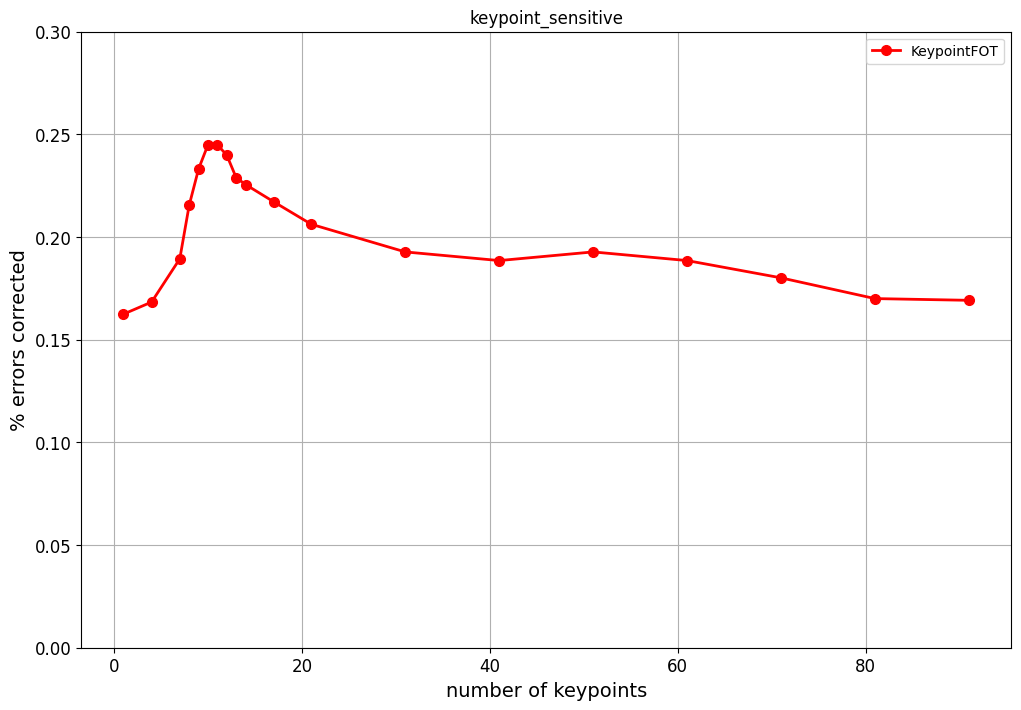

In [150]:
#@title Keypoint sensitive
record = Experiment.load("logs\\keypoint_sensitive\\240330_220246.json")
exp_name = "keypoint_sensitive"

## exclude some points
keep_inds = [0, 3, 6, 7, 8, 9, 10, 11, 12, 13, 16] + [20 + i*10 for i in range(0, 9)]
n_samples = len(record[exp_name]["KeypointFOT"]["keypoints"])
exclude_(exp_name, "KeypointFOT", record, inds=[i for i in range(100) if i not in keep_inds])

## plot
markers = ["o", "*", "s", "+"]
linestyles = ["-", "--", "-.", ":"]
colors = ["red", "blue", "green", "gray"]
window = 3
x_axis, y_axis = 'keypoints', 'accuracy'
plt.figure(figsize=(12, 8))
for i, (algo, record_) in enumerate(record[exp_name].items()):
    plt.plot(
        record_[x_axis], 
        moving_average(((np.array(record_[y_axis]) - gt) / (1 - gt)).tolist(), window),
        label=algo,
        color=colors[i],
        marker=markers[i],
        linestyle=linestyles[i],
        linewidth=2,
        markersize=7,
    )

plt.title(exp_name)
plt.xlabel("number of keypoints")
plt.ylabel("% errors corrected")
plt.ylim((0.0, 0.3))
plt.legend()
plt.grid(True)
plt.show()

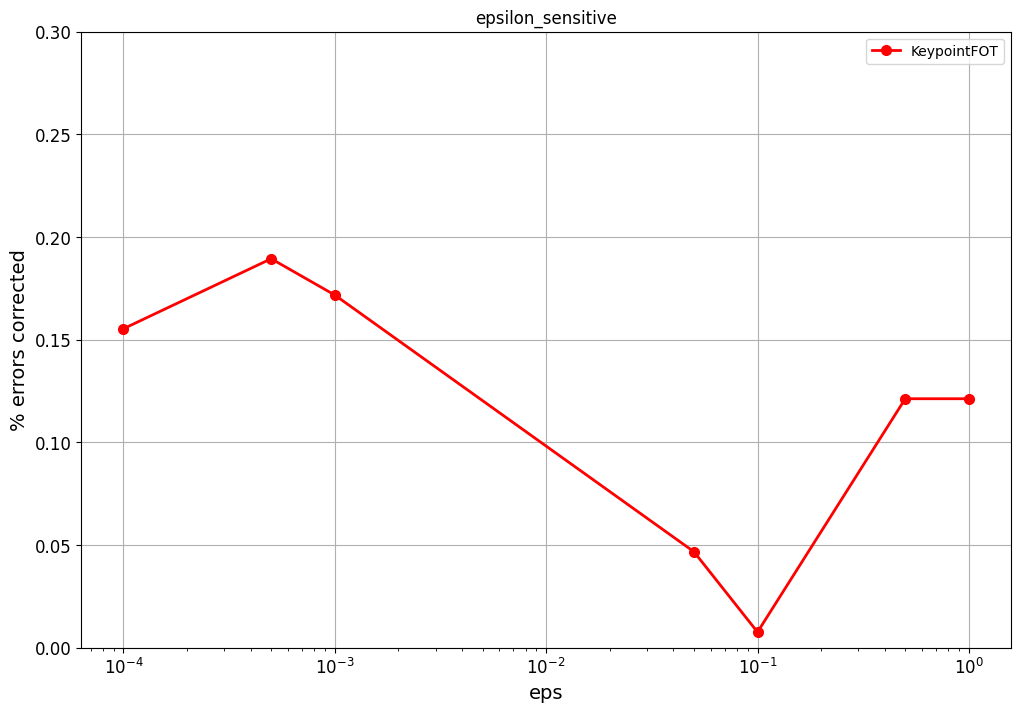

In [151]:
#@title Epsilon sensitive
record = Experiment.load("logs\\epsilon_sensitive\\240331_002431.json")
exp_name = "epsilon_sensitive"

## exclude some points
exclude_(exp_name, "KeypointFOT", record, inds=[3, 4])

## plot
markers = ["o", "*", "s", "+"]
linestyles = ["-", "--", "-.", ":"]
colors = ["red", "blue", "green", "gray"]
window = 2
x_axis, y_axis = 'eps', 'accuracy'
plt.figure(figsize=(12, 8))
for i, (algo, record_) in enumerate(record[exp_name].items()):
    plt.plot(
        record_[x_axis], 
        moving_average(((np.array(record_[y_axis]) - gt) / (1 - gt)).tolist(), window),
        label=algo,
        color=colors[i],
        marker=markers[i],
        linestyle=linestyles[i],
        linewidth=2,
        markersize=7
    )

plt.title(exp_name)
plt.xlabel("eps")
plt.ylabel("% errors corrected")
plt.xscale("log")
plt.ylim((0.0, 0.3))
plt.legend()
plt.grid(True)
plt.show()

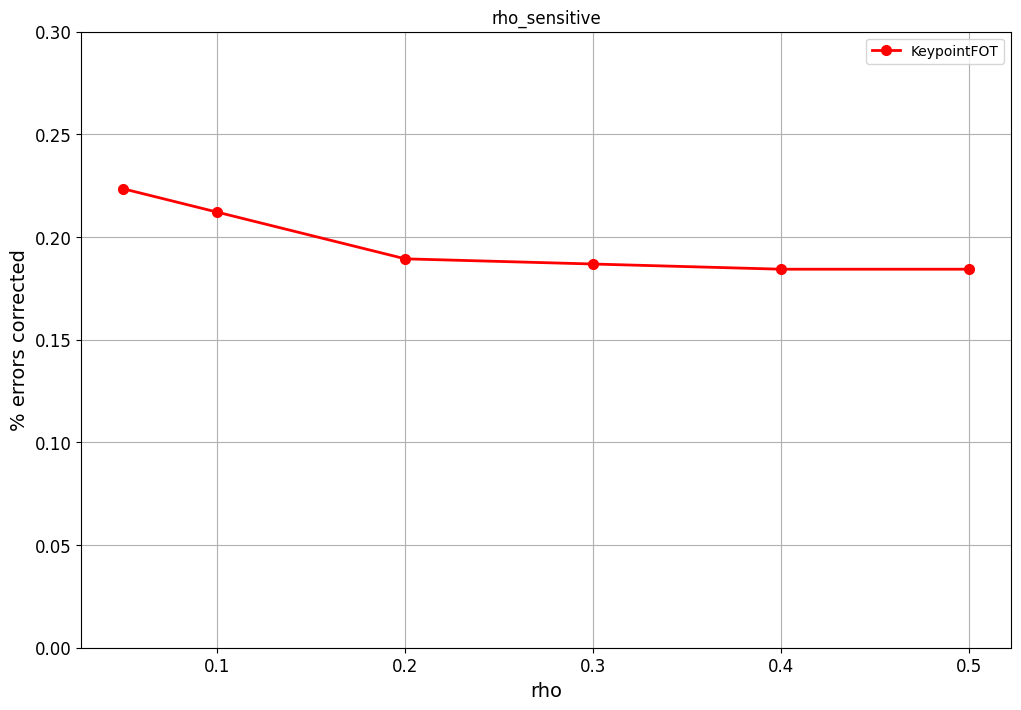

In [152]:
#@title Rho sensitive
record = Experiment.load("logs\\rho_sensitive\\240331_003154.json")
exp_name = "rho_sensitive"

## exclude some points
exclude_(exp_name, "KeypointFOT", record, inds=[1, 2])

## plot
markers = ["o", "*", "s", "+"]
linestyles = ["-", "--", "-.", ":"]
colors = ["red", "blue", "green", "gray"]
window = 2
x_axis, y_axis = 'rho', 'accuracy'
plt.figure(figsize=(12, 8))
for i, (algo, record_) in enumerate(record[exp_name].items()):
    plt.plot(
        record_[x_axis], 
        moving_average(((np.array(record_[y_axis]) - gt) / (1 - gt)).tolist(), window),
        label=algo,
        color=colors[i],
        marker=markers[i],
        linestyle=linestyles[i],
        linewidth=2,
        markersize=7
    )

plt.title(exp_name)
plt.xlabel("rho")
plt.ylabel("% errors corrected")
plt.ylim((0.0, 0.3))
plt.legend()
plt.grid(True)
plt.show()